In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
import pathlib as Path
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from pypdf import PdfReader
from reportlab.lib.units import cm, inch
from reportlab.pdfgen.canvas import Canvas

import qscope.fitting

In [14]:
# get home directory
home = Path.Path.home().joinpath("git/qscope")
print(home)

AttributeError: module 'pathlib' has no attribute 'home'

In [3]:
# Make a matplotlib dark theme
plt.style.use("default")

style = "light"

# Set the color scheme
if style == "dark":
    dark_grey = "#282828"
    light_grey = "#505050"
    plt.rcParams.update(
        {
            "lines.color": "white",
            "patch.edgecolor": "white",
            "text.color": dark_grey,
            "axes.facecolor": dark_grey,
            "axes.edgecolor": light_grey,
            "axes.labelcolor": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "grid.color": light_grey,
            # Set the legend font color
            "legend.labelcolor": "white",
            "legend.facecolor": dark_grey,
            "legend.framealpha": 0,
            "legend.edgecolor": light_grey,
            "figure.facecolor": dark_grey,
            "figure.edgecolor": dark_grey,
            "savefig.facecolor": dark_grey,
            "savefig.edgecolor": dark_grey,
        }
    )
elif style == "light":
    light_grey = "#F0F0F0"
    dark_grey = "#D0D0D0"
    plt.rcParams.update(
        {
            "lines.color": "black",
            "patch.edgecolor": "black",
            "text.color": "black",
            "axes.facecolor": "white",
            "axes.edgecolor": "black",
            "axes.labelcolor": "black",
            "xtick.color": "black",
            "ytick.color": "black",
            "grid.color": dark_grey,
            # Set the legend font color
            "legend.labelcolor": "black",
            "legend.facecolor": "white",
            "legend.framealpha": 0,
            "figure.facecolor": "white",
            "figure.edgecolor": "white",
            "savefig.facecolor": "white",
            "savefig.edgecolor": "white",
        }
    )

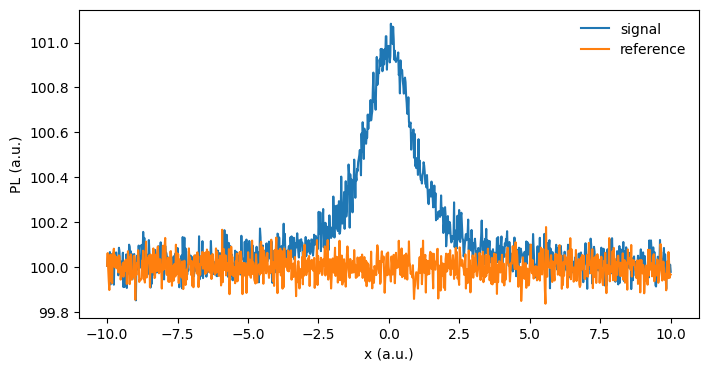

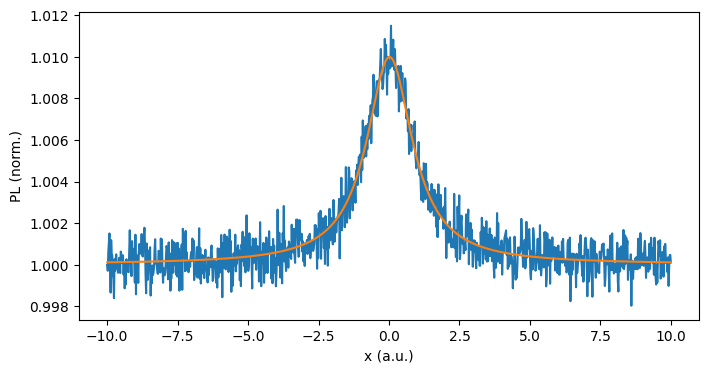

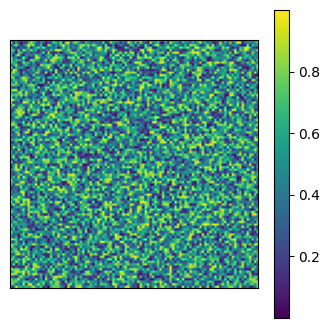

In [4]:
# use the lorentzian function from the fitting module to generate some data

FitModel = qscope.fitting.Lorentzian()

x = np.linspace(-10, 10, 1000)
y_sig = FitModel.function(x, 0, 1, 1, 0) + np.random.normal(0, 0.05, x.shape) + 100
y_ref = FitModel.function(x, 0, 0, 1, 0) + np.random.normal(0, 0.05, x.shape) + 100

# plot the data
fig = plt.figure(figsize=(8, 4))
plt.plot(x, y_sig, label="signal")
plt.plot(x, y_ref, label="reference")
plt.xlabel("x (a.u.)")
plt.ylabel("PL (a.u.)")
plt.legend()
fig.savefig("../test_data/test_meas.png")


# fit the data
FitModel.set_data(x, y_sig / y_ref)
FitModel.guess_parameters()
FitModel.fit()
x_fit, y_fit = FitModel.best_fit()
fit_results = FitModel.get_fit_results_txt()

# make the norm data
fig = plt.figure(figsize=(8, 4))
plt.plot(x, y_sig / y_ref)
plt.plot(x_fit, y_fit, label="fit")
plt.xlabel("x (a.u.)")
plt.ylabel("PL (norm.)")
fig.savefig("../test_data/test_norm.png")


# Make a fake imshow fig to test the code
fig = plt.figure(figsize=(4, 4))
plt.imshow(np.random.rand(100, 100))
plt.xticks([])
plt.yticks([])

plt.colorbar()

fig.savefig("../test_data/test_imshow.png")

In [5]:
# create a test pdf

pdf_path = "../test_data/_overview_test.pdf"

canvas = Canvas(pdf_path, pagesize=(33 * cm, 19 * cm))

# Add a title with a big font
titleobject = canvas.beginText(1 * cm, 18 * cm)
titleobject.setFont("Helvetica", 24)
titleobject.textLine("Test CW ODMR")
canvas.drawText(titleobject)

# add the meausuremnet line plot to the top right
canvas.drawImage(
    "../test_data/test_meas.png", 8 * cm, 10.5 * cm, 1.0 * 18 * cm, 1.0 * 9 * cm
)

# add the norm plot to the bottom right
canvas.drawImage(
    "../test_data/test_norm.png", 8 * cm, 0.5 * cm, 1.0 * 18 * cm, 1.0 * 9 * cm
)

# add the meausuremnet imshow image just under the title
canvas.drawImage("../test_data/test_imshow.png", 25 * cm, 11 * cm, 8 * cm, 8 * cm)

# add some text
textobject = canvas.beginText(1 * cm, 17 * cm)
textobject.setFont("Helvetica", 12)
textobject.textLines(
    "This is a test measurement. \n"
    + "params: \n "
    + "int time: 30 ms \n"
    + "RF power: 10 dBm \n"
    + "pi-time 100 ns \n"
    + "ref mod: no-rf"
)

canvas.drawText(textobject)


# Add some fake fit results
textobject = canvas.beginText(25 * cm, 7 * cm)
textobject.setFont("Helvetica", 12)
textobject.textLines(fit_results)

canvas.drawText(textobject)

canvas.save()

In [6]:
# create a test pdf

pdf_path = "../test_data/_overview_test_dark.pdf"

canvas = Canvas(pdf_path, pagesize=(33 * cm, 19 * cm))
# Make the background dark
canvas.setFillColorRGB(0.2, 0.2, 0.2)
canvas.rect(0, 0, 33 * cm, 19 * cm, fill=1)


# Add a title with a big font
titleobject = canvas.beginText(1 * cm, 18 * cm)
titleobject.setFont("Helvetica", 24)
titleobject.setFillColorRGB(1, 1, 1)
titleobject.textLine("Test CW ODMR")
canvas.drawText(titleobject)

# add the meausuremnet line plot to the top
canvas.drawImage(
    "../test_data/test_meas.png", 8 * cm, 10.5 * cm, 1.0 * 18 * cm, 1.0 * 9 * cm
)

# add the norm plot to the bottom
canvas.drawImage(
    "../test_data/test_norm.png", 8 * cm, 0.5 * cm, 1.0 * 18 * cm, 1.0 * 9 * cm
)

# add the meausuremnet imshow image to the top right
canvas.drawImage("../test_data/test_imshow.png", 25 * cm, 11 * cm, 8 * cm, 8 * cm)

# add AOI to the bottom right
canvas.drawImage("../test_data/test_imshow.png", 25 * cm, 0.5 * cm, 8 * cm, 8 * cm)

# add some text
textobject = canvas.beginText(1 * cm, 17 * cm)
textobject.setFont("Helvetica", 12)
textobject.textLines(
    "This is a test measurement. \n"
    + "params: \n "
    + "int time: 30 ms \n"
    + "RF power: 10 dBm \n"
    + "pi-time 100 ns \n"
    + "ref mod: no-rf"
)

canvas.drawText(textobject)


# Add some fake fit results
textobject = canvas.beginText(1 * cm, 7 * cm)
textobject.setFont("Helvetica", 12)
textobject.textLines(fit_results)

canvas.drawText(textobject)

canvas.save()